# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5),'APGAR5_CAT'] = 'Asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 6) & (sinasc['APGAR5'] <= 7),'APGAR5_CAT'] = 'Asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 8) & (sinasc['APGAR5'] <= 10),'APGAR5_CAT'] = 'Normal'

sinasc['APGAR5_CAT'].value_counts()


Normal              24469
Asfixia leve          241
asfixia grave          74
Asfixia moderada       68
Name: APGAR5_CAT, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Menos de 22 semanas'),
  Text(1, 0, '22 a 27 semanas'),
  Text(2, 0, '28 a 31 semanas'),
  Text(3, 0, '32 a 36 semanas'),
  Text(4, 0, '37 a 41 semanas'),
  Text(5, 0, '42 semanas e mais')])

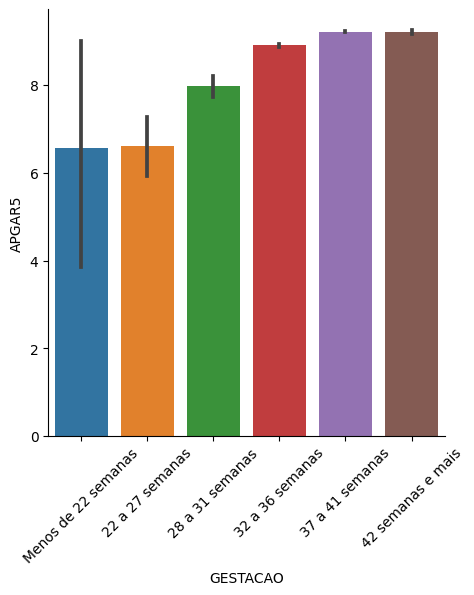

In [3]:
sns.catplot(x='GESTACAO'
            , y='APGAR5'
            , kind='bar'
            , order=['Menos de 22 semanas', 
                   '22 a 27 semanas', 
                   '28 a 31 semanas', 
                   '32 a 36 semanas', 
                   '37 a 41 semanas', 
                   '42 semanas e mais']
            , data=sinasc
           )
plt.xticks(rotation=45)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [4]:
cruz = pd.crosstab(sinasc["GESTACAO"], sinasc['APGAR5_CAT'])

cruz2 = cruz.reindex(
    index=['Menos de 22 semanas', 
           '22 a 27 semanas', 
           '28 a 31 semanas', 
           '32 a 36 semanas', 
           '37 a 41 semanas', 
           '42 semanas e mais'])

cruz2

APGAR5_CAT,Asfixia leve,Asfixia moderada,Normal,asfixia grave
GESTACAO,,,,
Menos de 22 semanas,1,0,4,2
22 a 27 semanas,10,1,27,21
28 a 31 semanas,11,12,68,3
32 a 36 semanas,56,19,1772,8
37 a 41 semanas,151,28,20849,33
42 semanas e mais,5,1,646,1


In [5]:
nova_ordem_colunas = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

cruz3 = cruz2.reindex(
    columns=nova_ordem_colunas)

cruz3

APGAR5_CAT,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
Menos de 22 semanas,2,NaN,NaN,NaN
22 a 27 semanas,21,NaN,NaN,NaN
28 a 31 semanas,3,NaN,NaN,NaN
32 a 36 semanas,8,NaN,NaN,NaN
37 a 41 semanas,33,NaN,NaN,NaN
42 semanas e mais,1,NaN,NaN,NaN


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
percentuais_linha = cruz2.div(cruz.sum(axis=1), axis=0) * 100

percentuais_linha

APGAR5_CAT,Asfixia leve,Asfixia moderada,Normal,asfixia grave
GESTACAO,,,,
22 a 27 semanas,16.949153,1.694915,45.762712,35.593220
28 a 31 semanas,11.702128,12.765957,72.340426,3.191489
32 a 36 semanas,3.018868,1.024259,95.525606,0.431267
37 a 41 semanas,0.716965,0.132947,98.993400,0.156688
42 semanas e mais,0.765697,0.153139,98.928025,0.153139
Menos de 22 semanas,14.285714,0.000000,57.142857,28.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

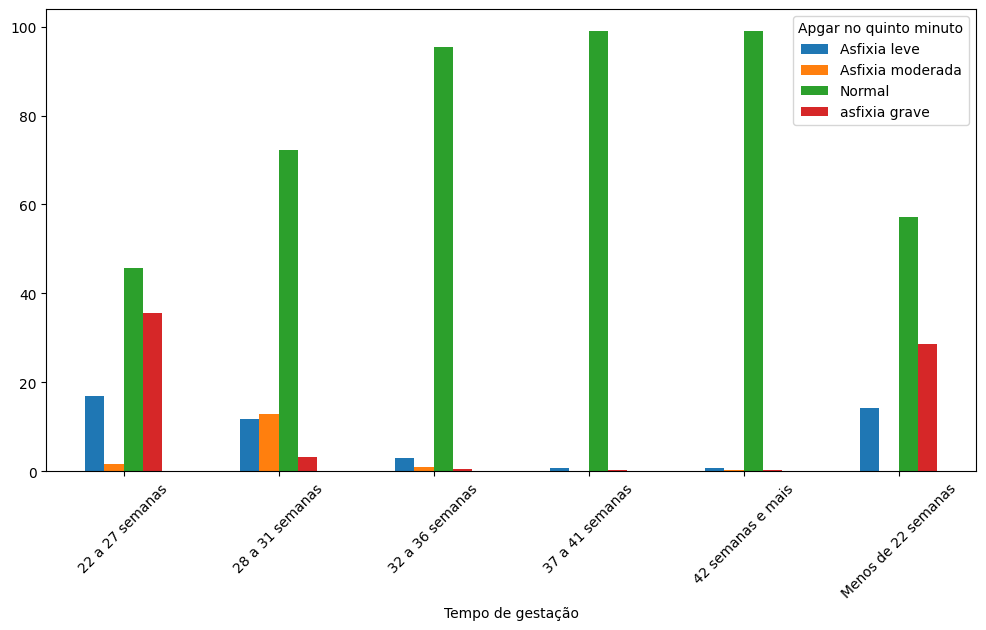

In [10]:
plt.rc('figure', figsize=(12,6))

percentuais_linha.plot.bar()
plt.xticks(rotation=45)
plt.xlabel(xlabel='Tempo de gestação')
plt.legend(title='Apgar no quinto minuto')

plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0')])

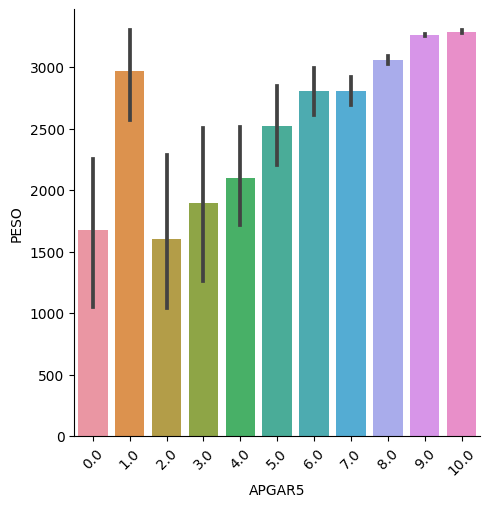

In [15]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=sinasc
           )
plt.xticks(rotation=45)